#User Retention & Churn Rate Analysis

1.   Weekly Active Users (WAUs)
2.   User Retention Heatmaps by Cohorts
3.   Top 5 most Listened Artists
4.   Top Artists Retention Heatmaps
5.   Churn Rate (Month over Month Drop-off)

Questions:
1. When is churn highest?
> From 2009-03 onwards churn rate skyrocketed from around 10% to 45% in a month.
2. Are certain artists causing better retention?
> Top 5 artists with highest retention: Muse, RadioHead, Coldplay, The Beatles and Nine Inch Nails.
3. Are older cohorts better retained than newer ones?
> 2005-2006 Cohorts have the highest user retention as per the heatmap.
4. Most Listened Artist?
> Radiohead with 120+ Weekly Active Listeners at a certain point in time.
5. How was the trend for weekly active users over time?
> WAU was trending upwards till 2009 and then crashed to the bottom.

In [ ]:
#Importing related libraries for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from pandas.errors import ParserError

In [ ]:
"""
-- Mount Google Drive to this Colab notebook but found a better way to download the dataset faster below --
from google.colab import drive
drive.mount('/content/drive')
"""

"\n-- Mount Google Drive to this Colab notebook but found a better way to download the dataset faster below --\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
# Faster way to upload dataset to google colab files (Local) as long as the dataset is stored in google drive and access is updated to viewer with link
! gdown --id 1vEHTAWnczz_WgOiE4hXgRLM34Z2noi_V

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1vEHTAWnczz_WgOiE4hXgRLM34Z2noi_V
From (redirected): https://drive.google.com/uc?id=1vEHTAWnczz_WgOiE4hXgRLM34Z2noi_V&confirm=t&uuid=9daa04d8-b6d6-4db5-b208-b6ffe6f287bc
To: /content/userid-timestamp-artid-artname-traid-traname.tsv
100% 2.53G/2.53G [00:36<00:00, 70.2MB/s]


In [ ]:
# Another file with userid - profile details
! gdown --id 1xMr7Blh0AjKdzSPbLv5UDdwDwyY5VuwF

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xMr7Blh0AjKdzSPbLv5UDdwDwyY5VuwF
To: /content/userid-profile.tsv
100% 37.8k/37.8k [00:00<00:00, 43.3MB/s]


In [ ]:
#Providing dataset file-path here
file_path = '/content/userid-timestamp-artid-artname-traid-traname.tsv'

In [ ]:
#Using pandas to convert dataset into a dataframe for analysis
try:
    df = pd.read_csv(file_path, sep='\t', header=None, on_bad_lines='skip', names=['user_id', 'timestamp', 'artist_id', 'artist_name', 'track_id', 'track_name'])
except ParserError as e:
    print(f"An error occurred while parsing the CSV: {e}")

In [ ]:
df.head()

,user_id,timestamp,artist_id,artist_name,track_id,track_name
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)


In [ ]:
#Extracting date information from timestamp (ISO Format) column and storing it in new date column
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df['date'] = df['timestamp'].dt.date
print(df['date'])

0           2009-05-04
1           2009-05-04
2           2009-05-04
3           2009-05-04
4           2009-05-04
               ...    
19098848    2008-01-27
19098849    2008-01-27
19098850    2008-01-27
19098851    2008-01-27
19098852    2008-01-27
Name: date, Length: 19098853, dtype: object


In [ ]:
# Extracting starting date of each week (Monday) from timestamp column | dt.to_period converts timestamp into period object eg. 2024--6-18/25
# .apply(lambda..) function extracts start time from period object created
df['week'] = df['timestamp'].dt.to_period('W').apply(lambda r: r.start_time)
print(df['week'])

/tmp/ipython-input-15-4195203292.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df['timestamp'].dt.to_period('W').apply(lambda r: r.start_time)


0          2009-05-04
1          2009-05-04
2          2009-05-04
3          2009-05-04
4          2009-05-04
              ...    
19098848   2008-01-21
19098849   2008-01-21
19098850   2008-01-21
19098851   2008-01-21
19098852   2008-01-21
Name: week, Length: 19098853, dtype: datetime64[ns]


In [ ]:
print("Unique Users: ", df['user_id'].nunique())

Unique Users:  992


In [ ]:
print("Date Range: ", df['date'].min(), "to", df['date'].max())

Date Range:  2005-02-14 to 2013-09-29


In [ ]:
#Calculating Weekly active users by grouping week and counting unique users | Reseting index helps rearrange column name
wau = df.groupby('week')['user_id'].nunique().reset_index()
wau.columns = ['week', 'active_users']

In [ ]:
print(wau)

          week  active_users
0   2005-02-14            45
1   2005-02-21            52
2   2005-02-28            57
3   2005-03-07            60
4   2005-03-14            58
..         ...           ...
224 2009-06-01            96
225 2009-06-08           108
226 2009-06-15           110
227 2010-08-09             1
228 2013-09-23             1

[229 rows x 2 columns]


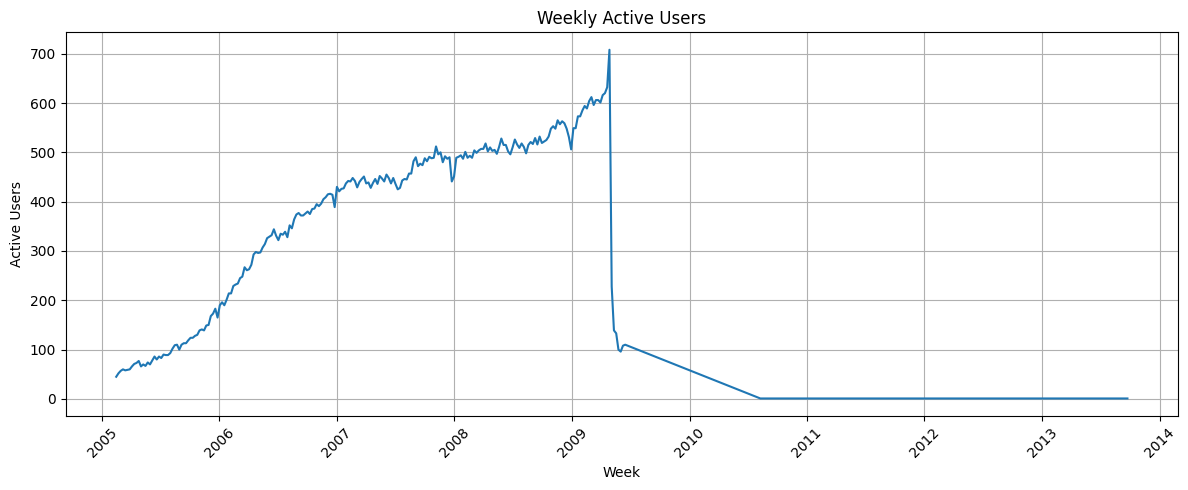

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=wau, x='week', y='active_users')
plt.title('Weekly Active Users')
plt.xlabel('Week')
plt.ylabel('Active Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Assgin Cohort for first active week
df['cohort_week'] = df.groupby('user_id')['week'].transform('min')

In [ ]:
# Cohort Retention Table | Subtracts two datetime columns = Timedelta -- like 7 days, 14 days
# / np.timedelta64(1,'W') -- divides the Timedelta by 1 week which converts the result to a number (Basically -- how many weeks is this timedelta?)
df['week_offset'] = ((df['week'] - df['cohort_week']) / np.timedelta64(1,'W')).astype(int)
cohort = df.groupby(['cohort_week','week_offset'])['user_id'].nunique().unstack().fillna(0)
print(cohort)

week_offset   0     1     2     3     4     5     6     7     8     9    ...  \
cohort_week                                                              ...   
2005-02-14   45.0  44.0  44.0  43.0  40.0  39.0  38.0  41.0  39.0  40.0  ...   
2005-02-21    8.0   7.0   7.0   6.0   7.0   6.0   7.0   7.0   7.0   5.0  ...   
2005-02-28    6.0   5.0   4.0   4.0   4.0   3.0   3.0   3.0   4.0   3.0  ...   
2005-03-07    5.0   5.0   4.0   5.0   4.0   5.0   4.0   5.0   3.0   4.0  ...   
2005-03-14    3.0   2.0   2.0   3.0   2.0   2.0   2.0   2.0   2.0   2.0  ...   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2009-04-06    1.0   1.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2009-04-13    4.0   4.0   4.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2009-04-20    5.0   5.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2009-04-27    1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2009-05-25    1.0   1.0   1.0   0.0   0.

In [ ]:
#Convert to retention percentage
cohort_pct = cohort.divide(cohort[0], axis=0)

In [ ]:
print(cohort_pct)

week_offset  0         1         2         3         4         5         6    \
cohort_week                                                                    
2005-02-14   1.0  0.977778  0.977778  0.955556  0.888889  0.866667  0.844444   
2005-02-21   1.0  0.875000  0.875000  0.750000  0.875000  0.750000  0.875000   
2005-02-28   1.0  0.833333  0.666667  0.666667  0.666667  0.500000  0.500000   
2005-03-07   1.0  1.000000  0.800000  1.000000  0.800000  1.000000  0.800000   
2005-03-14   1.0  0.666667  0.666667  1.000000  0.666667  0.666667  0.666667   
...          ...       ...       ...       ...       ...       ...       ...   
2009-04-06   1.0  1.000000  1.000000  1.000000  0.000000  0.000000  0.000000   
2009-04-13   1.0  1.000000  1.000000  0.250000  0.000000  0.000000  0.000000   
2009-04-20   1.0  1.000000  0.400000  0.000000  0.000000  0.000000  0.000000   
2009-04-27   1.0  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2009-05-25   1.0  1.000000  1.000000  0.

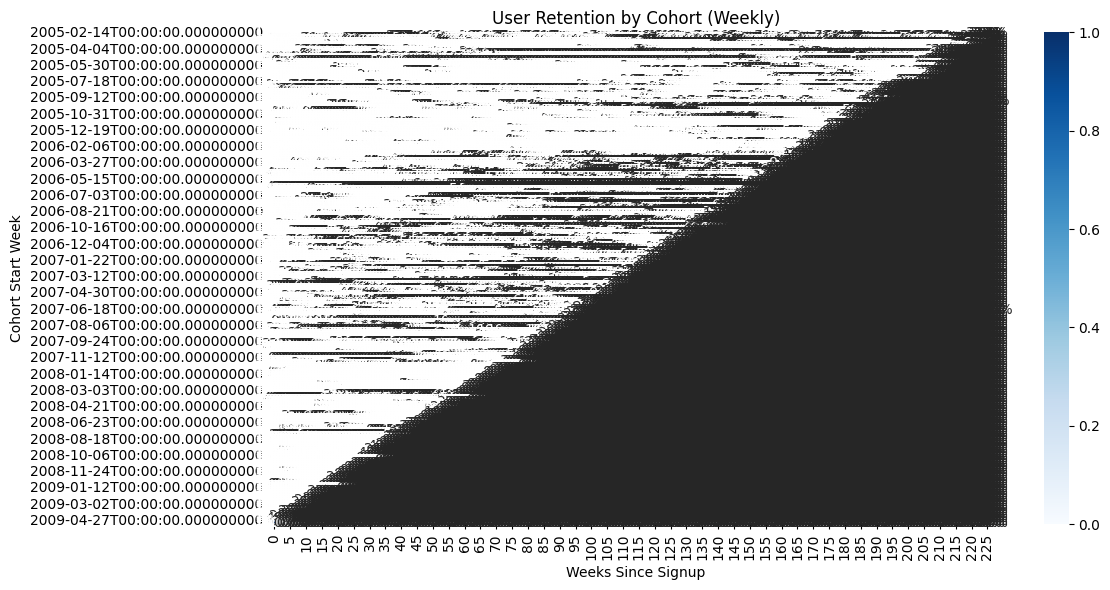

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(cohort_pct, annot=True, fmt='.0%', cmap='Blues')
plt.title('User Retention by Cohort (Weekly)')
plt.xlabel('Weeks Since Signup')
plt.ylabel('Cohort Start Week')
plt.tight_layout()
plt.show()

In [ ]:
#Converting cohort start week to cohort start month since the above heatmap is not readable because of the large data size for cohort analysis
df['cohort_month'] = df['cohort_week'].dt.to_period('M').astype(str)

In [ ]:
df['cohort_month'].head()

,cohort_month
0,2006-08
1,2006-08
2,2006-08
3,2006-08
4,2006-08


In [ ]:
print(df['week_offset'].max())

327


In [ ]:
#Offset week bins (0-3,4-7,8-11,12+ weeks)
bins = [0,3,7,11, df['week_offset'].max() + 1]
labels = ['0-3 weeks', '4-7 weeks', '8-11 weeks', '12+ weeks']
df['week_offset_bin'] = pd.cut(df['week_offset'], bins=bins, labels=labels, right=False)

In [ ]:
df['week_offset_bin'].head()

,week_offset_bin
0,12+ weeks
1,12+ weeks
2,12+ weeks
3,12+ weeks
4,12+ weeks


In [ ]:
# Grouping Cohort Month and Week_Offset_Bin
cohort_binned = df.groupby(['cohort_month','week_offset_bin'])['user_id'].nunique().unstack().fillna(0)

/tmp/ipython-input-31-2437279649.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_binned = df.groupby(['cohort_month','week_offset_bin'])['user_id'].nunique().unstack().fillna(0)


In [ ]:
#Normalize to get retention %
cohort_binned_pct = cohort_binned.divide(cohort_binned.iloc[:,0], axis=0)

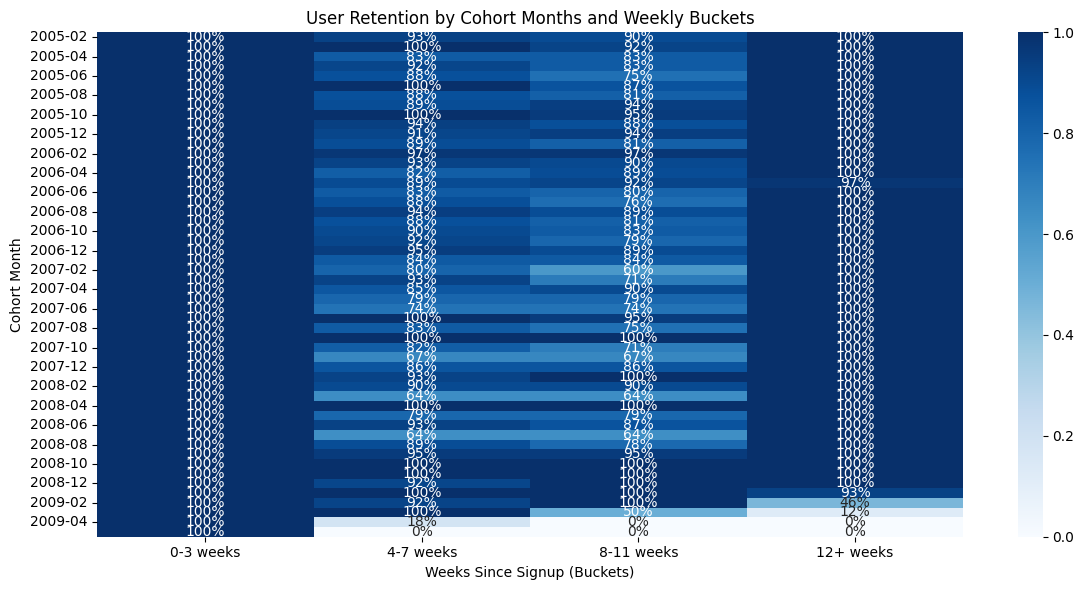

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(cohort_binned_pct, annot=True, fmt='.0%', cmap='Blues')
plt.title('User Retention by Cohort Months and Weekly Buckets')
plt.xlabel('Weeks Since Signup (Buckets)')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()

In [ ]:
#Converting cohort start week to cohort start month since the above heatmap is not good enough
df['cohort_year'] = df['cohort_week'].dt.year.astype(str)

In [ ]:
cohort_binned_yr = df.groupby(['cohort_year','week_offset_bin'])['user_id'].nunique().unstack().fillna(0)

/tmp/ipython-input-35-1926958722.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_binned_yr = df.groupby(['cohort_year','week_offset_bin'])['user_id'].nunique().unstack().fillna(0)


In [ ]:
cohort_binned_yr_pct = cohort_binned_yr.divide(cohort_binned_yr.iloc[:,0], axis=0)

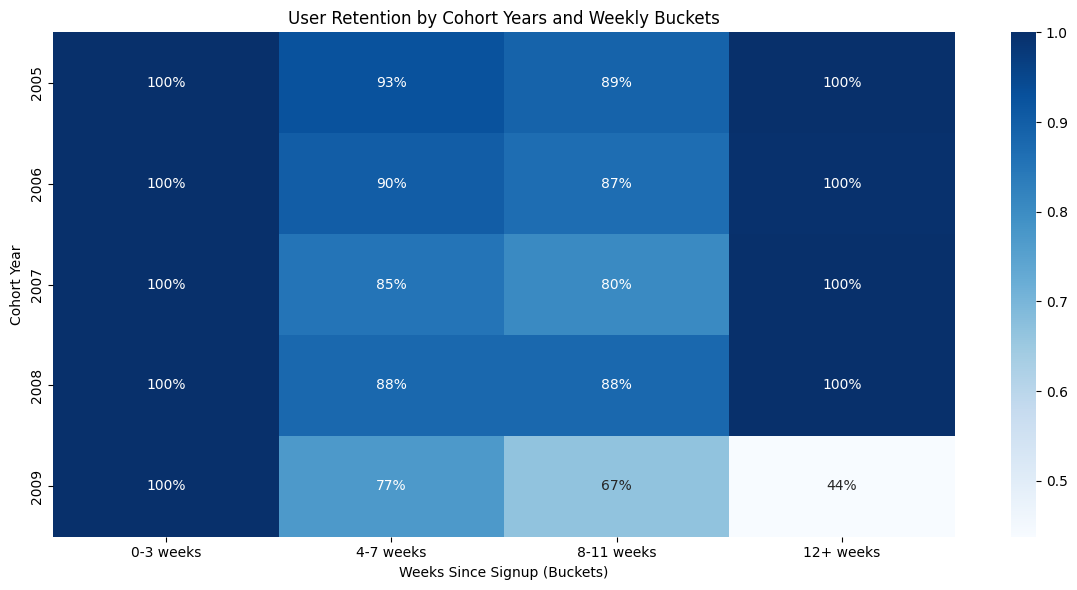

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(cohort_binned_yr_pct, annot=True, fmt='.0%', cmap='Blues')
plt.title('User Retention by Cohort Years and Weekly Buckets')
plt.xlabel('Weeks Since Signup (Buckets)')
plt.ylabel('Cohort Year')
plt.tight_layout()
plt.show()

## Top 5 Most Listened Artists

In [ ]:
#Top 5 most listened artists | Counting names of the artists and then selecting top 5 of them; index - extracts only the artist names (not counts) as an index object and tolist puts them in a list.
top_artists = df['artist_name'].value_counts().head(5).index.tolist()
print(top_artists)

['Radiohead', 'The Beatles', 'Nine Inch Nails', 'Muse', 'Coldplay']


In [ ]:
# .isin(top_artists) checks if each value in artist_name is in the top artists column and returns a Boolean Series - True/False
# df[...] Filters DataFrame using Boolean Series and keeps only the rows where the condition is True
artist_df = df[df['artist_name'].isin(top_artists)]

In [ ]:
artist_wau = artist_df.groupby(['week','artist_name'])['user_id'].nunique().reset_index()

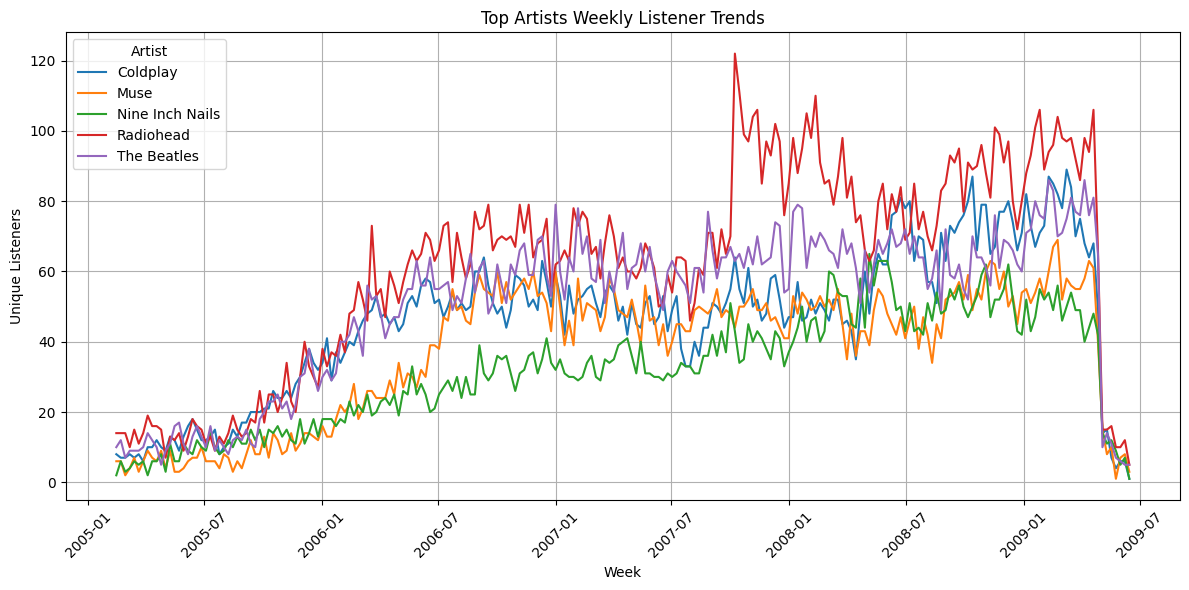

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=artist_wau, x='week', y='user_id', hue='artist_name')
plt.title('Top Artists Weekly Listener Trends')
plt.xlabel('Week')
plt.ylabel('Unique Listeners')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Artist')
plt.show()

#Top Artists Retention Heatmaps

/tmp/ipython-input-42-2509200617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_df['cohort_year'] = artist_df.groupby('user_id')['week'].transform('min').dt.year.astype(str)
/tmp/ipython-input-42-2509200617.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_df['week_offset'] = ((artist_df['week'] - artist_df.groupby('user_id')['week'].transform('min')) / np.timedelta64(1,'W')).astype(int)
/tmp/ipython-input-42-2509200617.py:10: SettingWithCopyWarning: 
A value is trying to be set on a co

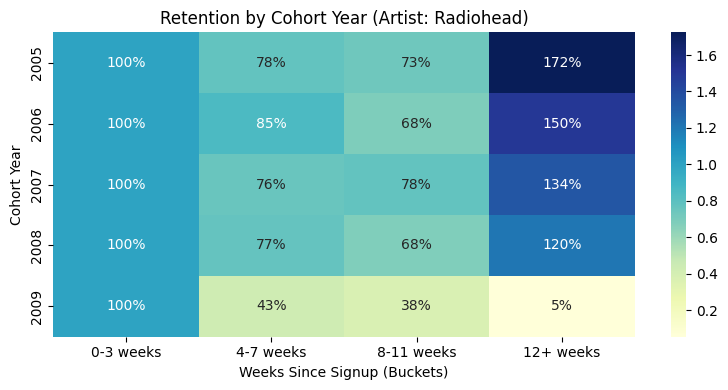

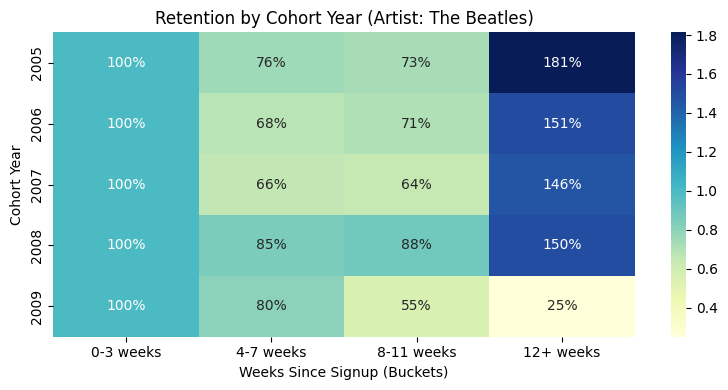

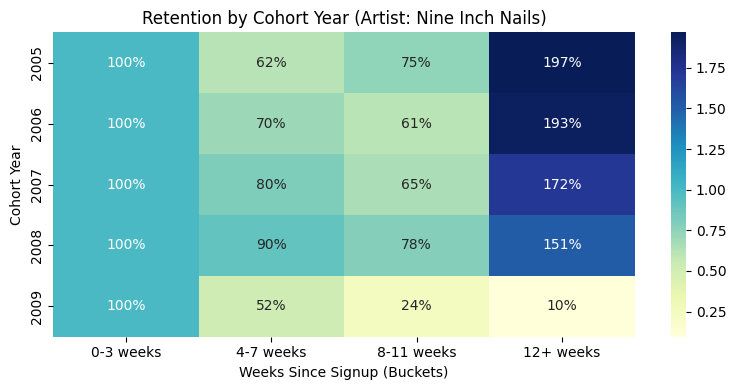

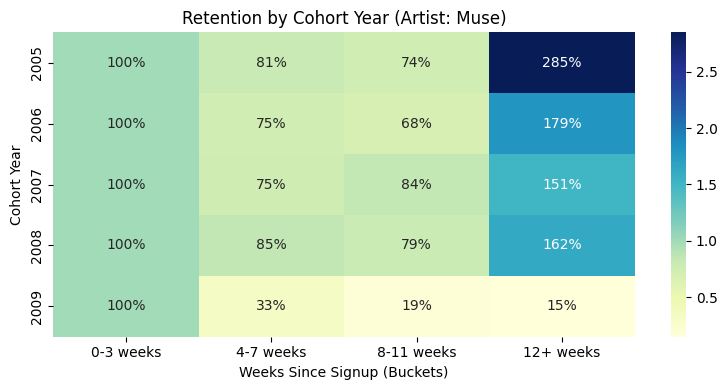

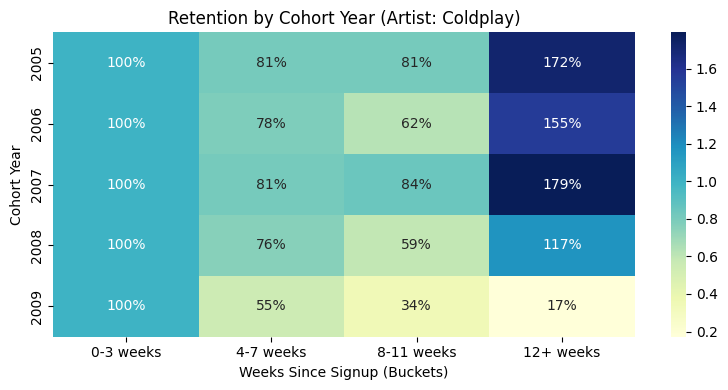

In [ ]:
# Assign Cohort Year
artist_df['cohort_year'] = artist_df.groupby('user_id')['week'].transform('min').dt.year.astype(str)

#Calculate week offset
artist_df['week_offset'] = ((artist_df['week'] - artist_df.groupby('user_id')['week'].transform('min')) / np.timedelta64(1,'W')).astype(int)

#Creating week offset bins
bins = [0,3,7,11, artist_df['week_offset'].max() + 1]
labels = ['0-3 weeks', '4-7 weeks', '8-11 weeks', '12+ weeks']
artist_df['week_offset_bin'] = pd.cut(artist_df['week_offset'], bins=bins, labels=labels, right=False)

#Group by artist and cohort year and week bin
artist_retention = artist_df.groupby(['artist_name','cohort_year','week_offset_bin'])['user_id'].nunique().unstack().fillna(0)

#Normalize to get retention %
artist_retention_pct = artist_retention.divide(artist_retention.iloc[:,0], axis=0)

#Segmented heatmap for each top artist
for artist in top_artists:
    if artist in artist_retention_pct.index:
      plt.figure(figsize=(8,4))
      sns.heatmap(artist_retention_pct.loc[artist], annot=True, fmt='.0%', cmap='YlGnBu')
      plt.title(f'Retention by Cohort Year (Artist: {artist})')
      plt.xlabel('Weeks Since Signup (Buckets)')
      plt.ylabel('Cohort Year')
      plt.tight_layout()
      plt.show()

# Churn Rate (Week over Week Drop-off)

In [ ]:
#Grouping unique users by week
weekly_users = df.groupby('week')['user_id'].nunique().reset_index()
weekly_users.head(10)

,week,user_id
0,2005-02-14,45
1,2005-02-21,52
2,2005-02-28,57
3,2005-03-07,60
4,2005-03-14,58
5,2005-03-21,59
6,2005-03-28,60
7,2005-04-04,66
8,2005-04-11,71
9,2005-04-18,73


In [ ]:
#Creating empty list to store churn info for each week as a dictionary
churn_data = []

In [ ]:
#Loop
for i in range(len(weekly_users)-1):
  current_week = weekly_users.iloc[i]
  next_week = weekly_users.iloc[i+1]
  churned_users = current_week - next_week
  churn_rate = len(churned_users) / len(current_week) if len(current_week) > 0 else 0

  churn_data.append({'week': weekly_users.index[i+1], 'churned_users': len(churned_users), 'total_users': len(current_week) , 'churn_rate': churn_rate})

In [ ]:
churn_df = pd.DataFrame(churn_data)

In [ ]:
churn_df.tail(10)

,week,churned_users,total_users,churn_rate
218,219,2,2,1.0
219,220,2,2,1.0
220,221,2,2,1.0
221,222,2,2,1.0
222,223,2,2,1.0
223,224,2,2,1.0
224,225,2,2,1.0
225,226,2,2,1.0
226,227,2,2,1.0
227,228,2,2,1.0


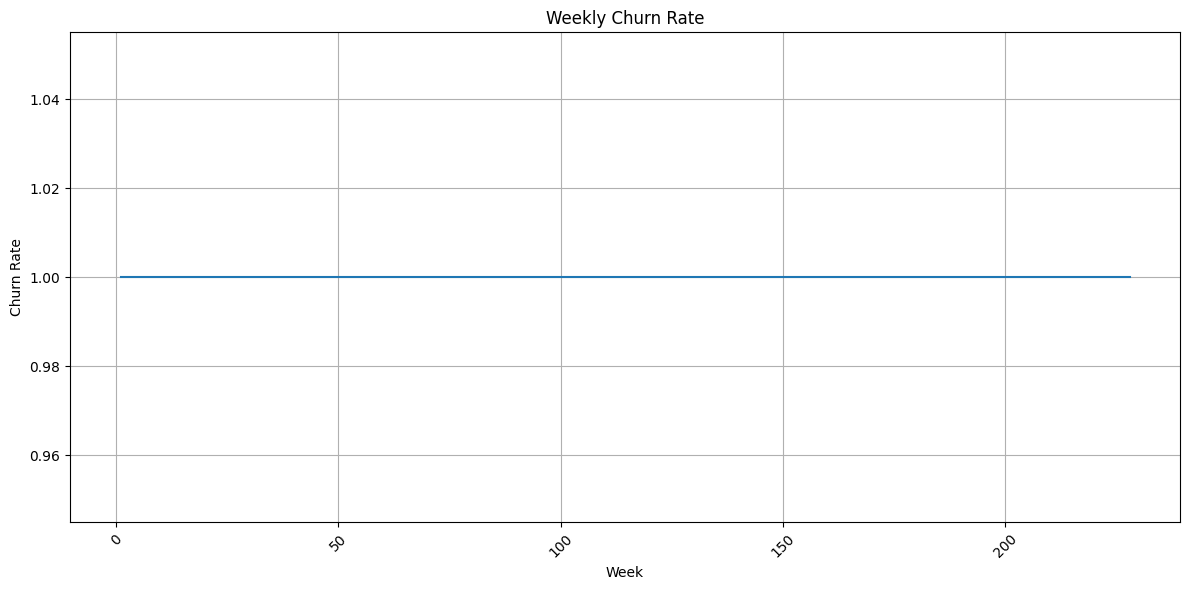

In [ ]:
#Plot Churn Rate
plt.figure(figsize=(12,6))
sns.lineplot(data=churn_df, x='week', y='churn_rate')
color='red'
plt.title('Week-over-Week Churn Rate')
plt.xlabel('Week')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(churn_df.head(10))

   week  churned_users  total_users  churn_rate
0     1              2            2         1.0
1     2              2            2         1.0
2     3              2            2         1.0
3     4              2            2         1.0
4     5              2            2         1.0
5     6              2            2         1.0
6     7              2            2         1.0
7     8              2            2         1.0
8     9              2            2         1.0
9    10              2            2         1.0


In [ ]:
print(churn_df['churn_rate'].describe())

count    228.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: churn_rate, dtype: float64


In [ ]:
#Calculating monthly churn rate
df['month'] = df['timestamp'].dt.to_period('M').astype(str)
monthly_users = df.groupby('month')['user_id'].apply(set).sort_index()
print(monthly_users)

/tmp/ipython-input-54-2444875836.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['timestamp'].dt.to_period('M').astype(str)


month
2005-02    {user_000174, user_000833, user_000348, user_0...
2005-03    {user_000174, user_000963, user_000833, user_0...
2005-04    {user_000963, user_000348, user_000639, user_0...
2005-05    {user_000963, user_000348, user_000639, user_0...
2005-06    {user_000963, user_000348, user_000639, user_0...
2005-07    {user_000963, user_000124, user_000348, user_0...
2005-08    {user_000963, user_000124, user_000348, user_0...
2005-09    {user_000963, user_000348, user_000639, user_0...
2005-10    {user_000963, user_000124, user_000348, user_0...
2005-11    {user_000124, user_000348, user_000139, user_0...
2005-12    {user_000124, user_000348, user_000139, user_0...
2006-01    {user_000963, user_000124, user_000348, user_0...
2006-02    {user_000963, user_000718, user_000124, user_0...
2006-03    {user_000963, user_000718, user_000124, user_0...
2006-04    {user_000348, user_000165, user_000154, user_0...
2006-05    {user_000348, user_000529, user_000165, user_0...
2006-06    {user_0

In [ ]:
#Loop
monthly_churn_data = []
for i in range(len(monthly_users)-1):
  current_month = monthly_users.iloc[i]
  next_month = monthly_users.iloc[i+1]
  churned_users = current_month - next_month
  churn_rate = len(churned_users) / len(current_month) if len(current_month) > 0 else 0

  monthly_churn_data.append({'month': monthly_users.index[i+1], 'churned_users': len(churned_users), 'total_users': len(current_month) , 'churn_rate': churn_rate})

In [ ]:
monthly_churn_df = pd.DataFrame(monthly_churn_data)
monthly_churn_df.head(10)

,month,churned_users,total_users,churn_rate
0,2005-03,1,55,0.018182
1,2005-04,6,71,0.084507
2,2005-05,10,83,0.120482
3,2005-06,10,88,0.113636
4,2005-07,7,98,0.071429
5,2005-08,9,111,0.081081
6,2005-09,10,122,0.081967
7,2005-10,9,134,0.067164
8,2005-11,9,147,0.061224
9,2005-12,9,162,0.055556


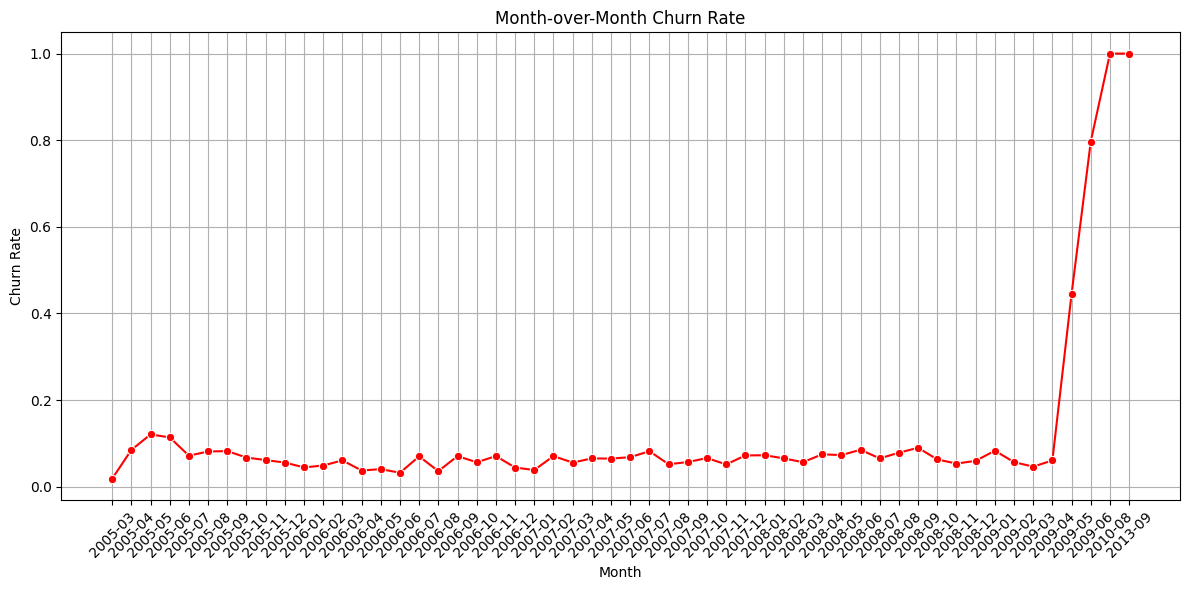

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_churn_df, x='month', y='churn_rate', marker='o', color='red')
plt.title('Month-over-Month Churn Rate')
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(monthly_churn_df['churn_rate'].describe())
print(monthly_churn_df.head(10))

count    54.000000
mean      0.119046
std       0.207785
min       0.018182
25%       0.055473
50%       0.065182
75%       0.077276
max       1.000000
Name: churn_rate, dtype: float64
     month  churned_users  total_users  churn_rate
0  2005-03              1           55    0.018182
1  2005-04              6           71    0.084507
2  2005-05             10           83    0.120482
3  2005-06             10           88    0.113636
4  2005-07              7           98    0.071429
5  2005-08              9          111    0.081081
6  2005-09             10          122    0.081967
7  2005-10              9          134    0.067164
8  2005-11              9          147    0.061224
9  2005-12              9          162    0.055556


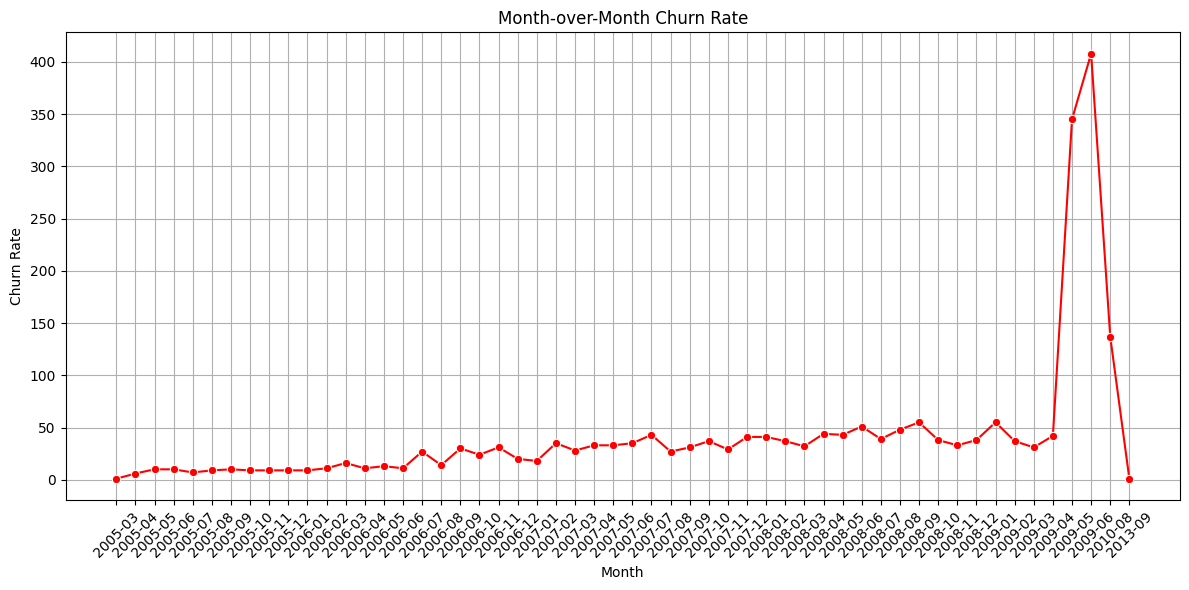

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_churn_df, x='month', y='churned_users', marker='o', color='red')
plt.title('Month-over-Month Churn Rate')
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()